## Movie Data Analysis

Please fill out:
* Student name: Yue Yu, Margaret Boland, Peter Burton 
* Student pace: full time
* Scheduled project review date/time: June 3rd 2022
* Instructor name: 
* Blog post URL:


## Microsoft Movie Studio Analysis 

## PART I
## WHY ENTER THE MOVIE BUSINESS? 

Big companies have increasingly been entering the movie making business in an effort to drive positive consumer sentiment for their company and products, compete on the same playing field as their competitors, and diversify offerings to drive alternative revenue streams. 

However, movies are expensive endeavors. Data from marketing research firm emarketer shows that Netflix spent 17.8 billion USD on acquiring and creating content. While Netflix has become one of the premiere movie streaming services in the industry, the high spend on content has not always paid off. Following poor subscriber numbers in its Q1 2022 earnings report, Netflix's stock dropped 30perc. in one day - losing $45bn off its market value. 

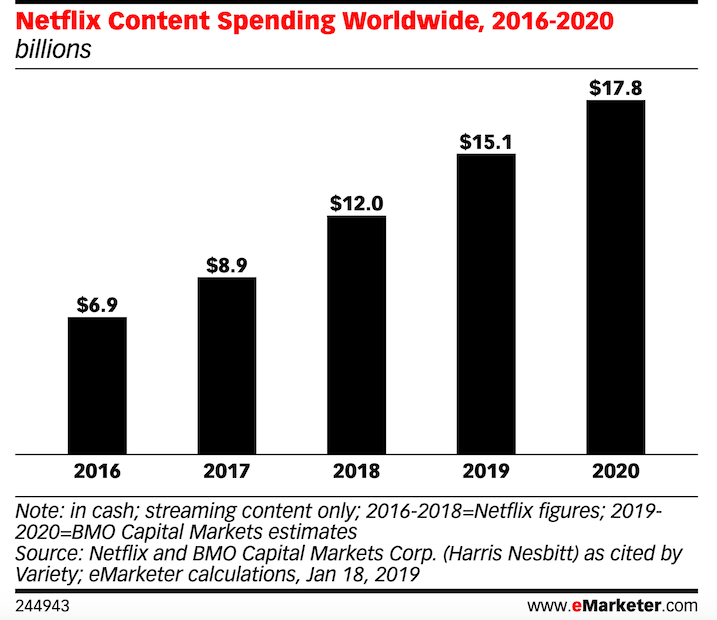

[source](https://www.emarketer.com/chart/226017/netflix-content-spending-worldwide-2016-2020-billions)

Netflix serves as an example of the major risk that entering the movie business entails and serves as a backdrop of our team's research strategy for Microsoft's new Movie Studio. To mitigate the risk and volatility of the movie business exemplified by Netflix's recent struggles, we focused our research on the qualities of the most profitable movies. To evaluate the movie market and create the best possible recommendations for Microsoft we combined data from the following sources: 

[IMDb](https://www.imdb.com/) 

[The-Numbers](https://www.the-numbers.com/)

In summary, to create a viable new Movie Studio our team determined it was most important to pursue profitable movies and used the above data sources to find characteristics of the most profitable movies. 

## PART II 
## Opening & Cleaning the Data

## Import Relevant Packages and Open IMDb File

In [55]:
import pandas as pd
import numpy as np
import sqlite3
import zipfile
import matplotlib.pyplot as plt

In [2]:
# upzip im.db.zip file
with zipfile.ZipFile('./zippedData/im.db.zip') as zipObj:
    zipObj.extractall(path='./zippedData/')

In [56]:
con = sqlite3.connect('zippedData/im.db')
cursor = con.cursor()

In [57]:
# check table names
schema_df = pd.read_sql("""
                        SELECT 
                            *
                        FROM 
                            sqlite_master """, con)
schema_df

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


We think genres, director and runtime of the movie have large impact on the profitability of a movie. So, we are going to make a table that contains all these information first.

## Open & Clean the Budget Table

In [58]:
df_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
df_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [59]:
"""All the numbers in this table need to be converted to integers"""

df_budgets['budgets(USD)'] = df_budgets['production_budget'].str.replace('$','').str.replace(',', '').astype(int)
df_budgets['dom_gross(USD)'] = df_budgets['domestic_gross'].str.replace('$','').str.replace(',', '').astype(int)
df_budgets['world_gross(USD)'] = df_budgets['worldwide_gross'].str.replace('$','').str.replace(',', '').astype('int64')

In [60]:
# keep the int columns only
budget_clean = df_budgets.drop(['production_budget','domestic_gross','worldwide_gross'], axis=1)
budget_clean.head()

,id,release_date,movie,budgets(USD),dom_gross(USD),world_gross(USD)
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


We are going to work with data from the SQL database. The next step is to put together all the data we need from the database with the budget table above.

## Join movie_basics and budget_clean Tables to Create Central Working Table

In [61]:
df_basics = pd.read_sql("""
                        SELECT 
                            movie_id, 
                            primary_title AS movie, 
                            genres, 
                            runtime_minutes
                        FROM 
                            movie_basics """, con)

In [62]:
# we want all the movies' name and movie id to be shown in the table.
movie_budget = budget_clean.merge(df_basics, on='movie')
df_budget_merged = movie_budget
movie_budget.head()


,id,release_date,movie,budgets(USD),dom_gross(USD),world_gross(USD),movie_id,genres,runtime_minutes
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,tt1775309,Horror,93.0
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,tt1298650,"Action,Adventure,Fantasy",136.0
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,tt6565702,"Action,Adventure,Sci-Fi",113.0
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,tt2395427,"Action,Adventure,Sci-Fi",141.0
4,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,tt4154756,"Action,Adventure,Sci-Fi",149.0


## Create Estimated Profit Variable

To make sure that we are only working with profitable movies, we created an Estimated Profit variable, which serves as our proxy for ROI. Note: It is not equivalent to ROI because a simple deduction of budget from worldwide gross does not take into account marketing budgets, payments to theaters and distributors, etc. 

In [63]:
# add a new column that shows the profit of each movie
movie_budget['Estimated Profit'] = movie_budget['world_gross(USD)']-movie_budget['budgets(USD)']
movie_budget.head()

,id,release_date,movie,budgets(USD),dom_gross(USD),world_gross(USD),movie_id,genres,runtime_minutes,Estimated Profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,tt1775309,Horror,93.0,2351345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,tt1298650,"Action,Adventure,Fantasy",136.0,635063875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,tt6565702,"Action,Adventure,Sci-Fi",113.0,-200237650
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,tt2395427,"Action,Adventure,Sci-Fi",141.0,1072413963
4,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,tt4154756,"Action,Adventure,Sci-Fi",149.0,1748134200


## Join Directors and Director's Name to the Central Working Table

In [64]:
df_directors = pd.read_sql("""
                        SELECT 
                            *
                        FROM 
                            directors """, con)
df_directors.head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502


In [65]:
df_person = pd.read_sql("""
                        SELECT 
                            *
                        FROM 
                            persons """, con)
df_person.head()

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"


In [66]:
director_df = pd.read_sql("""
                            SELECT
                                d.movie_id, 
                                p.primary_name AS director_name
                            FROM 
                                directors AS d
                                INNER JOIN persons AS p
                                    ON d.person_id = p.person_id
                                """, con)
director_df.head()

,movie_id,director_name
0,tt0285252,Tony Vitale
1,tt0462036,Bill Haley
2,tt0835418,Jay Chandrasekhar
3,tt0835418,Jay Chandrasekhar
4,tt0878654,Albert Pyun


In [67]:
# add director names to the table
movie_df = movie_budget.merge(director_df, on='movie_id', how='inner')
movie_clean_df = movie_df.drop_duplicates(subset='movie',keep='first')
movie_clean_df.head()

,id,release_date,movie,budgets(USD),dom_gross(USD),world_gross(USD),movie_id,genres,runtime_minutes,Estimated Profit,director_name
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,tt1775309,Horror,93.0,2351345279,Atsushi Wada
2,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,tt1298650,"Action,Adventure,Fantasy",136.0,635063875,Rob Marshall
7,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,tt6565702,"Action,Adventure,Sci-Fi",113.0,-200237650,Simon Kinberg
13,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,tt2395427,"Action,Adventure,Sci-Fi",141.0,1072413963,Joss Whedon
18,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,tt4154756,"Action,Adventure,Sci-Fi",149.0,1748134200,Anthony Russo


## PART III
## Analyzing the Most Popular Movie Genres from Profitable Movies

In [15]:
most_profit_movie = movie_clean_df.sort_values(by=['Estimated Profit'],ascending=False)[:100]
most_profit_movie['genres'].value_counts().head(10)

Action,Adventure,Sci-Fi       25
Adventure,Animation,Comedy    15
Action,Adventure,Fantasy       8
Action,Adventure,Comedy        7
Action,Adventure,Animation     5
Adventure,Family,Fantasy       4
Action,Crime,Thriller          3
Adventure,Drama,Fantasy        2
Adventure,Drama,Sci-Fi         2
Action,Adventure,Thriller      2
Name: genres, dtype: int64

In [16]:
most_profit_movie = movie_clean_df.sort_values(by=['Estimated Profit'],ascending=False)[:100]
profit_genres = movie_clean_df.sort_values(by=['Estimated Profit'], ascending=False)['genres'][:100]
pop_gen_ls = ['Act,Adv,Sci','Adv,Anim,Com','Act,Adv,Fan','Act,Adv,Com','Act,Adv,Anim','Adv,Fam,Fan','Act,Crim,Thri','Anim,Com, Fam',
             'Act,Adv,Thri','Adv,Dram,Sci']

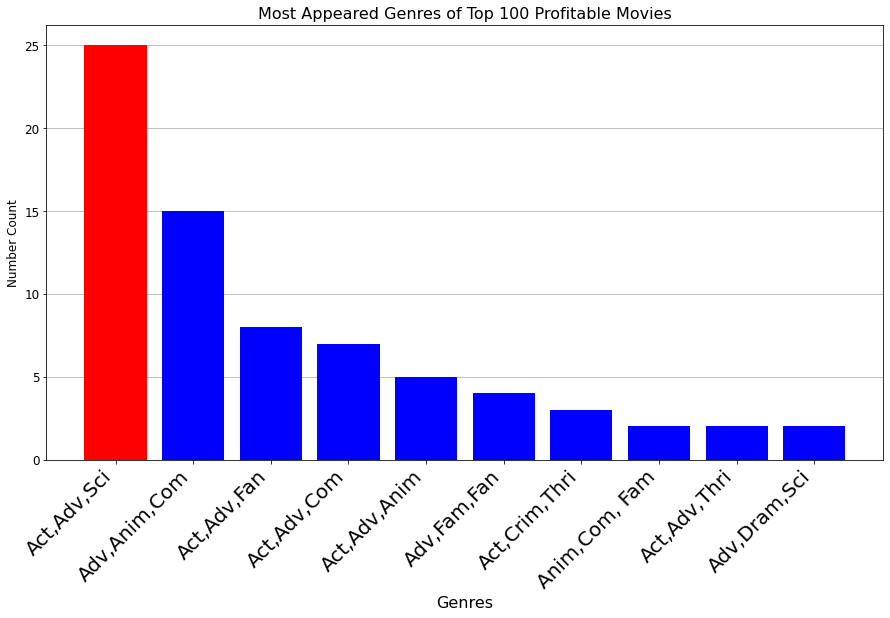

In [68]:
fig, ax = plt.subplots(figsize=(15,8))
c = ['red','blue','blue','blue','blue','blue','blue','blue','blue','blue']
ax.bar(x=profit_genres.value_counts()[:10].index, height=profit_genres.value_counts()[:10], zorder=3,color=c)
ax.set_xlabel('Genres', fontsize=16)
ax.set_ylabel('Number Count')
plt.xticks(np.arange(0,10),fontsize=20,rotation=45,labels=pop_gen_ls,ha='right')
ax.set_title('Most Appeared Genres of Top 100 Profitable Movies', fontsize=16)
ax.grid(axis='y', zorder=0)
plt.show()
fig.savefig('most_appeared_genres.png',bbox_inches='tight');

##  Determining Average Budget of Each Genre

In [69]:
genres = profit_genres.value_counts()[:10].index
top_profit_movie_genres = movie_clean_df.loc[movie_clean_df['genres'].isin(genres)]
profit_genres_ls = top_profit_movie_genres.groupby('genres')
mean_budgets = profit_genres_ls.mean()['budgets(USD)']

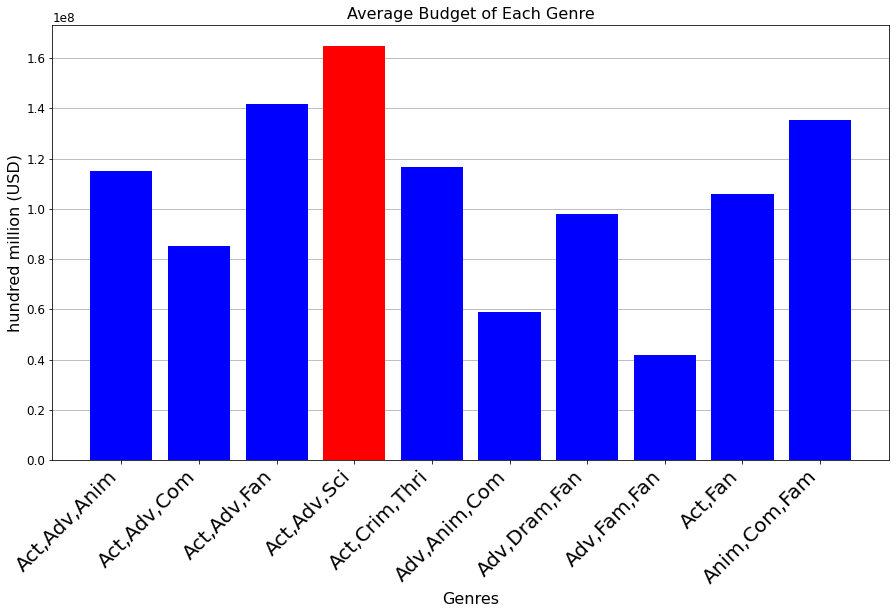

In [72]:
gen_ls = ['Act,Adv,Anim','Act,Adv,Com','Act,Adv,Fan','Act,Adv,Sci','Act,Crim,Thri','Adv,Anim,Com',
         'Adv,Dram,Fan','Adv,Fam,Fan','Act,Fan','Anim,Com,Fam']
fig, ax = plt.subplots(figsize=(15,8))
c = ['blue','blue','blue','red','blue','blue','blue','blue','blue','blue']
ax.bar(x=mean_budgets.index, height=mean_budgets, zorder=3, color=c)
ax.set_xlabel('Genres', fontsize=16)
ax.set_ylabel('hundred million (USD)',fontsize=16)
plt.xticks(np.arange(0,10),fontsize=20,rotation=45,labels=gen_ls,ha='right')

ax.set_title('Average Budget of Each Genre', fontsize=16)
ax.grid(axis='y', zorder=0)
plt.show()
fig.savefig('Average_Budget.png',bbox_inches='tight');

## PART IV
## Analyzing Directors of Most Profitable Movies

## Cleaning Table for Duplicates

In [20]:
movie_clean_df = movie_df.drop_duplicates(subset='movie',keep='first')

In [21]:
movie_clean_df.head()

,id,release_date,movie,budgets(USD),dom_gross(USD),world_gross(USD),movie_id,genres,runtime_minutes,Estimated Profit,director_name
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,tt1775309,Horror,93.0,2351345279,Atsushi Wada
2,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,tt1298650,"Action,Adventure,Fantasy",136.0,635063875,Rob Marshall
7,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,tt6565702,"Action,Adventure,Sci-Fi",113.0,-200237650,Simon Kinberg
13,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,tt2395427,"Action,Adventure,Sci-Fi",141.0,1072413963,Joss Whedon
18,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,tt4154756,"Action,Adventure,Sci-Fi",149.0,1748134200,Anthony Russo


In [22]:
movie_df['estimated_profit'] = movie_df['world_gross(USD)']-movie_df['budgets(USD)']
movie_clean_df['estimated_profit'] = movie_clean_df['world_gross(USD)']-movie_clean_df['budgets(USD)']

<ipython-input-22-9114c18305d4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_clean_df['estimated_profit'] = movie_clean_df['world_gross(USD)']-movie_clean_df['budgets(USD)']


In [23]:
movie_clean_df.sort_values("estimated_profit", inplace=True)

<ipython-input-23-a37d04ded4e9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_clean_df.sort_values("estimated_profit", inplace=True)


In [24]:
Top_500 = movie_clean_df.tail(500)
Top_100 = movie_clean_df.tail(100)
Top_250 = movie_clean_df.tail(250)
Top_50 = movie_clean_df.tail(50)

In [25]:
movie_clean_df.shape

(2298, 12)

In [26]:
Directors = (movie_clean_df['director_name'].unique())
Director_list = Directors.tolist()
Director_list


['Simon Kinberg',
 'Simon Wells',
 'F. Gary Gray',
 'David Ayer',
 'Chris Sanders',
 'Edwine Dorival',
 'Andrey Konchalovskiy',
 'Xiao Feng',
 'Chris Wedge',
 'Landen Wakil',
 'Richard Gilliam',
 'Frank Coraci',
 'Chris Jordan',
 'Nonzee Nimibutr',
 'Robert Schwentke',
 'Michael Mann',
 'Reed Morano',
 'James Gray',
 'Quentin Lee',
 'Emilio Roso',
 'Micah Fink',
 'Zakary Hallett',
 'Lawrence Kasanoff',
 'Neil Corbin',
 'Michael B. Clifford',
 'Ben Affleck',
 'Daniel Espinosa',
 'Nic Good',
 'Jess Carson',
 'John Crowley',
 'Alex Alessi',
 'Elizabeth Berry',
 'Emilio Rodriguez',
 'Mario Van Peebles',
 'Jimmy Hayward',
 'Ash Brannon',
 'Amanda Boyle',
 'Guy Ritchie',
 'Roland Joffé',
 'Mikael Håfström',
 'Werner Herzog',
 'Joel Schumacher',
 'Seok-hoon Lee',
 'Sngmoo Lee',
 'Peter Berg',
 'David Frankel',
 'Gabriele Muccino',
 'Robbie Pickering',
 'Jean-Pierre Jeunet',
 'Walter Hill',
 'Robert Zemeckis',
 'Matt Kendrick',
 'Joe Cornish',
 'Guel Arraes',
 'Andrew Tiernan',
 'Frédéric Aubu

## Creating a Dictionary of Directors with a List of their Profits in Each of their Films

In [27]:
directors_profits = dict(zip(movie_clean_df.director_name, movie_clean_df.estimated_profit))
directors_profits

{'Simon Kinberg': -200237650,
 'Simon Wells': -110450242,
 'F. Gary Gray': 984846267,
 'David Ayer': 571059887,
 'Chris Sanders': 438068425,
 'Edwine Dorival': -79448583,
 'Andrey Konchalovskiy': -69533984,
 'Xiao Feng': -64483721,
 'Chris Wedge': 162794441,
 'Landen Wakil': -61583254,
 'Richard Gilliam': -60376918,
 'Frank Coraci': 90805525,
 'Chris Jordan': -59500000,
 'Nonzee Nimibutr': -53296816,
 'Robert Schwentke': 30891409,
 'Michael Mann': -50334996,
 'Reed Morano': -50000000,
 'James Gray': -8414989,
 'Quentin Lee': -49318920,
 'Emilio Roso': -48884073,
 'Micah Fink': -48572910,
 'Zakary Hallett': -45183506,
 'Lawrence Kasanoff': -44926294,
 'Neil Corbin': -44373310,
 'Michael B. Clifford': -43467226,
 'Ben Affleck': 182640757,
 'Daniel Espinosa': 123542162,
 'Nic Good': -40515477,
 'Jess Carson': -40187130,
 'John Crowley': 51076141,
 'Alex Alessi': -39920877,
 'Elizabeth Berry': -39640994,
 'Emilio Rodriguez': -39536270,
 'Mario Van Peebles': -2270616,
 'Jimmy Hayward': 5538

In [28]:
sorted(directors_profits, key=directors_profits.get, reverse=True)

['Atsushi Wada',
 'Pete Meads',
 'Anthony Russo',
 'Colin Trevorrow',
 'James Wan',
 'Joss Whedon',
 'Ryan Coogler',
 'J.A. Bayona',
 'Adam Green',
 'Christophe Gans',
 'Pierre Coffin',
 'Brad Bird',
 'Shane Black',
 'F. Gary Gray',
 'Kyle Balda',
 'Ryan Fleck',
 'Michael Bay',
 'Sam Mendes',
 'Jon Favreau',
 'Jake Kasdan',
 'Jared Bush',
 'Lee Unkrich',
 'Gareth Edwards',
 'Bryan Singer',
 'Tim Burton',
 'Andrew Stanton',
 'Chris Renaud',
 'Christopher Nolan',
 'Jun Falkenstein',
 'Mike Thurmeier',
 'Peter Jackson',
 'Tim Miller',
 'Ruben Fleischer',
 'Francis Lawrence',
 'Jon Watts',
 'Artie Mandelberg',
 'David Leitch',
 'Patty Jenkins',
 'Taika Waititi',
 'Andy Muschietti',
 'David Slade',
 'Rob Marshall',
 'David Yates',
 'Zack Snyder',
 'Tom McGrath',
 'James Gunn',
 'Gary Ross',
 'Mike Mitchell',
 'Alfonso Cuarón',
 'Robert Stromberg',
 'David Ayer',
 'Christophe Lourdelet',
 'Joachim Rønning',
 'Ridley Scott',
 'Dan Scanlon',
 'Matt Reeves',
 'Marc Webb',
 'Sam Taylor-Johnson',

In [29]:
from operator import itemgetter
top_profits5 = dict(sorted(directors_profits.items(), key = itemgetter(1), reverse = True)[:5])
top_profits10 = dict(sorted(directors_profits.items(), key = itemgetter(1), reverse = True)[:10])

In [30]:
top_profits10

{'Atsushi Wada': 2351345279,
 'Pete Meads': 2008208395,
 'Anthony Russo': 1748134200,
 'Colin Trevorrow': 1433854864,
 'James Wan': 1328722794,
 'Joss Whedon': 1292935897,
 'Ryan Coogler': 1148258224,
 'J.A. Bayona': 1135772799,
 'Adam Green': 1122469910,
 'Christophe Gans': 1099199706}

## Graphing Top Directors by Individual Movie Profit 

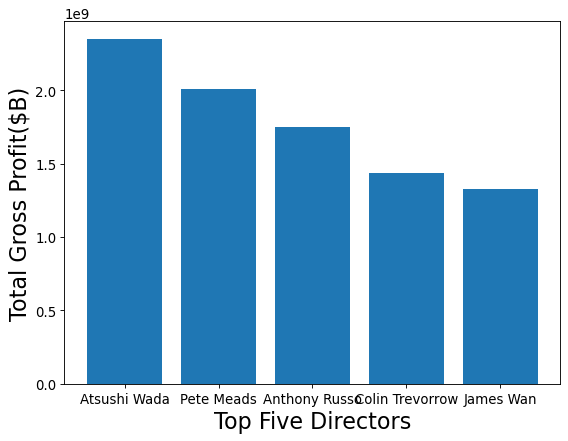

In [31]:
from matplotlib.pyplot import figure
keys = top_profits5.keys()
values = top_profits5.values()
figure(figsize=(8, 6), dpi=80)
plt.rcParams.update({'font.size': 12})
plt.bar(keys, values)
plt.xlabel('Top Five Directors', fontsize=20)
plt.ylabel('Total Gross Profit($B)', fontsize=20)
plt.show()



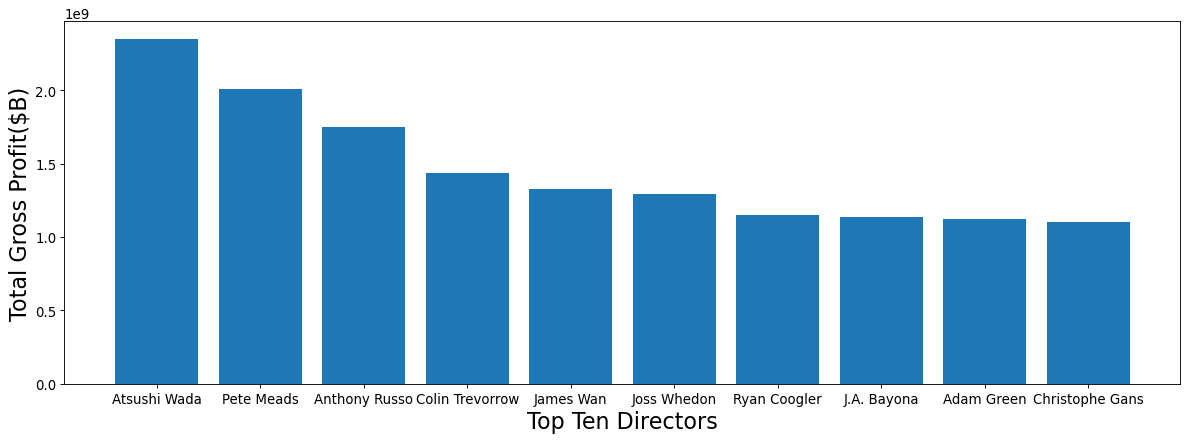

In [32]:
from matplotlib.pyplot import figure
keys = top_profits10.keys()
values = top_profits10.values()
figure(figsize=(18, 6), dpi=80)
plt.rcParams.update({'font.size': 12})
plt.bar(keys, values)
plt.xlabel('Top Ten Directors', fontsize=20)
plt.ylabel('Total Gross Profit($B)', fontsize=20)
plt.show()

## Looking at the Number of Blockbuster Profitable Hits in the Top 500 by Director

In [33]:
top_500_appearances = Top_500.director_name.value_counts().head(10).tolist()

In [34]:
Top_500.director_name.value_counts().head(10)

Steven Spielberg      6
Jon M. Chu            5
Ridley Scott          5
James Wan             4
Mike Mitchell         4
Christopher Nolan     4
Zack Snyder           3
Matthew Vaughn        3
Seth Gordon           3
Paul W.S. Anderson    3
Name: director_name, dtype: int64

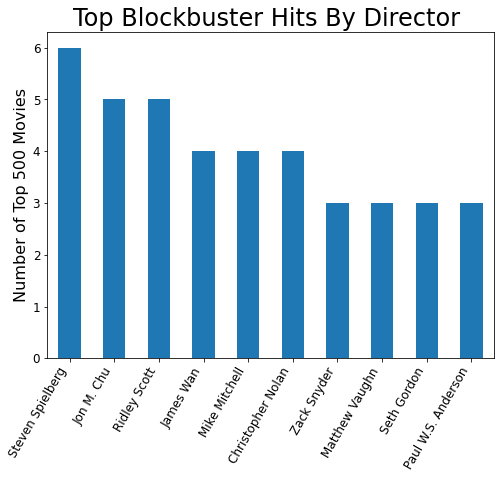

In [35]:
numb_movies = figure(figsize=(8, 6))
Top_500['director_name'].value_counts().head(10).plot(kind='bar');
plt.ylabel('Number of Top 500 Movies', fontsize=16) 
plt.title("Top Blockbuster Hits By Director ", fontsize=24)
plt.xticks(rotation = 60)
plt.xticks(ha='right')
plt.show()
numb_movies.savefig('Top500perdirector', bbox_inches='tight')

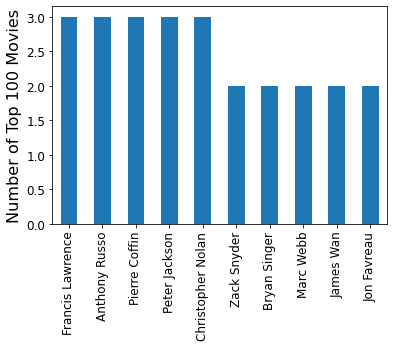

In [36]:
Top_100['director_name'].value_counts().head(10).plot(kind='bar');
plt.ylabel('Number of Top 100 Movies', fontsize=16)
plt.show()

In [37]:
top_directors_list = {'Steven Spielberg', 'Jon M. Chu', 'Ridley Scott', 'James Wan', 'Mike Mitchell', 'Christopher Nolan', 'James DeMonaco', 'Tom McGrath', 'Shawn Levy', 'Tim Burton'} 


## Looking at the Consistently Top Directors and Graphing Scatter Plots of their Relative Success

In [38]:
top_directors_500_df = (Top_500[Top_500.director_name.isin(top_directors_list)])
top_directors_500_df.rename(columns = {'budgets(USD)':'budgets_USD', 'world_gross(USD)':'world_gross_USD'}, inplace = True)
top_directors_500_df.head()


C:\Users\YueYu\Anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,id,release_date,movie,budgets_USD,dom_gross(USD),world_gross_USD,movie_id,genres,runtime_minutes,Estimated Profit,director_name,estimated_profit
5557,48,"Feb 11, 2011",Justin Bieber: Never Say Never,13000000,73013910,99034125,tt1702443,"Documentary,Music",105.0,86034125,Jon M. Chu,86034125
1939,12,"Dec 25, 2011",War Horse,70000000,79883359,156815529,tt1568911,"Drama,History,War",146.0,86815529,Steven Spielberg,86815529
773,89,"May 11, 2012",Dark Shadows,150000000,79727149,238202668,tt1077368,"Comedy,Fantasy,Horror",113.0,88202668,Tim Burton,88202668
7541,67,"Jun 7, 2013",The Purge,3000000,64473115,91266581,tt2184339,"Horror,Thriller",85.0,88266581,James DeMonaco,88266581
2391,99,"Apr 9, 2010",Date Night,55000000,98711404,152269033,tt1279935,"Comedy,Crime,Romance",88.0,97269033,Shawn Levy,97269033


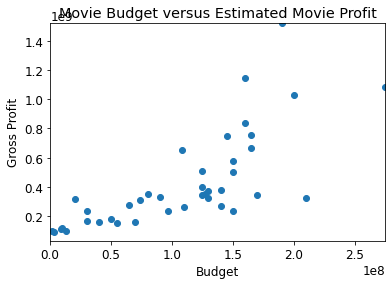

In [39]:
fig, ax = plt.subplots()
ax.scatter(x=top_directors_500_df['budgets_USD'], y=top_directors_500_df['world_gross_USD'])
ax.set(xlim = (0, 2.750000e+08), ylim = (3.126658e+07, 1.518723e+09), 
            title = "Movie Budget versus Estimated Movie Profit",
            xlabel = "Budget",
            ylabel = 'Gross Profit');

ax.set_xlim = (1.500000e+06, 2.750000e+08)
ax.set_ylim =(9.126658e+07, 1.518723e+09)
plt.show()

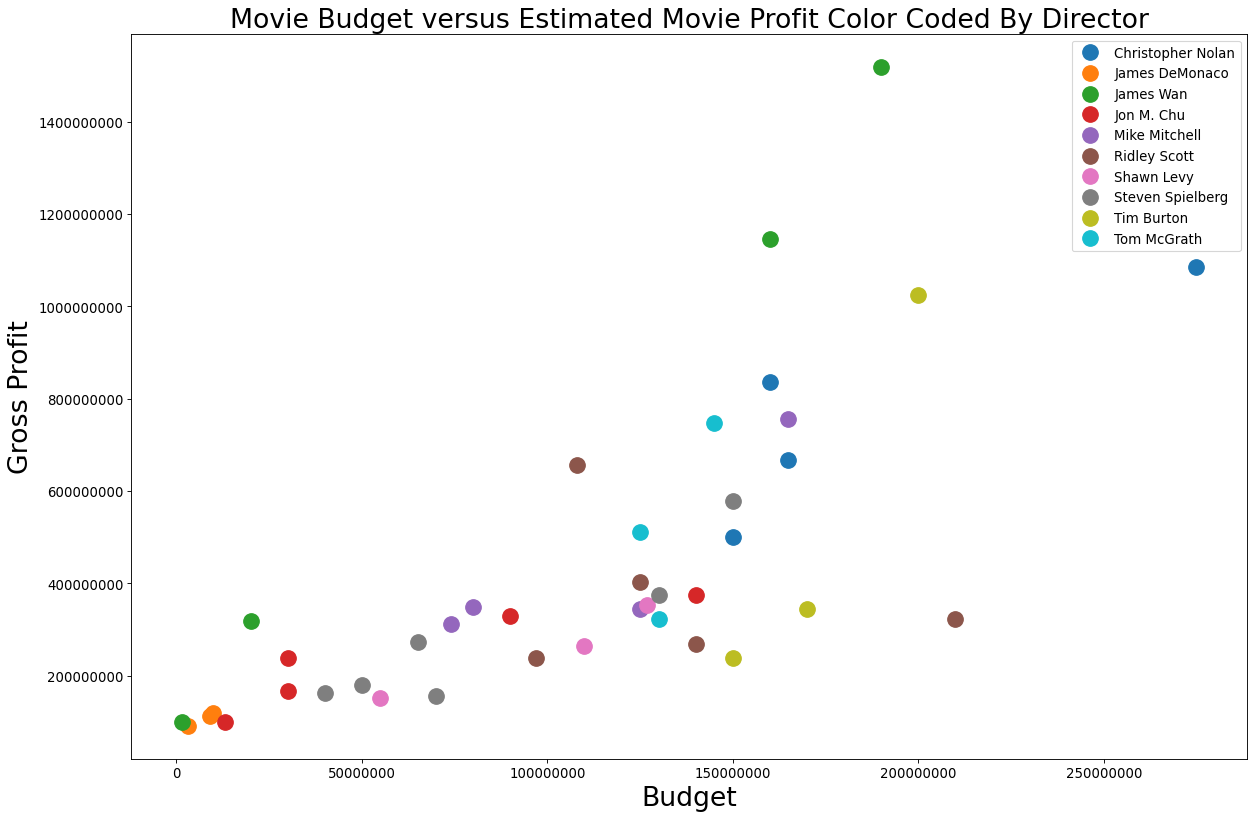

In [40]:
groups = top_directors_500_df.groupby('director_name')

from matplotlib.pyplot import figure

directorcolorcode = figure(figsize=(18, 12), dpi=80)

for name, group in groups:
    
 
    plt.plot(group.budgets_USD, group.world_gross_USD, marker='o', linestyle='', markersize=14, label=name)
    plt.ticklabel_format(style='plain', useOffset=False)
    plt.xlabel('Budget', fontsize=24)
    plt.ylabel('Gross Profit', fontsize=24)
    
  
    plt.title("Movie Budget versus Estimated Movie Profit Color Coded By Director", fontsize=24)

    
   
plt.legend()
directorcolorcode.savefig('Movie_Budget_Director.png')

## PART IV
## Movie Profitablity and Runtime Analysis


The final variable we examined to make a recommendation to Microsoft Movie Studio was a movie's runtime and whether or not that runtime correlated with higher estimated profitability. 

Using the movie_clean_df dataframe, we cleaned the dataframe to only include data that had values for the runtime_minutes variable. 

## Analyzing the runtime data for overall dataset, profitable dataset, and unprofitable movies 

In [41]:
#Drop rows that are missing runtime_minutes values
movie_clean_df = movie_clean_df.dropna(subset=["runtime_minutes"])
#Check that the runtime_minutes has no missing values
movie_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2144 entries, 7 to 0
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                2144 non-null   int64  
 1   release_date      2144 non-null   object 
 2   movie             2144 non-null   object 
 3   budgets(USD)      2144 non-null   int32  
 4   dom_gross(USD)    2144 non-null   int32  
 5   world_gross(USD)  2144 non-null   int64  
 6   movie_id          2144 non-null   object 
 7   genres            2138 non-null   object 
 8   runtime_minutes   2144 non-null   float64
 9   Estimated Profit  2144 non-null   int64  
 10  director_name     2144 non-null   object 
 11  estimated_profit  2144 non-null   int64  
dtypes: float64(1), int32(2), int64(4), object(5)
memory usage: 201.0+ KB


In [42]:
#Create a new variable with  mean number of runtime_minutes for all movies in 
#dataset to get a better understanding of centrality.
runtime_minutes_mean = movie_clean_df["runtime_minutes"].mean()
runtime_minutes_mean

102.05923507462687

In [43]:
#Create a new variable with the median number of runtime_minutes for all movies in 
#dataset to get a better understanding of centrality. 
runtime_minutes_median = movie_clean_df["runtime_minutes"].median()
runtime_minutes_median

101.0

In [44]:
#find mean number of runtime_minutes for all profitable movies in dataset
#create data frame of profitable movies
profitable_movie_df = movie_clean_df[movie_clean_df["Estimated Profit"] > 0]
#find the mean and median runtime of the profitable movies
profitable_movie_df["runtime_minutes"].mean()
profitable_movie_df["runtime_minutes"].median()

104.0

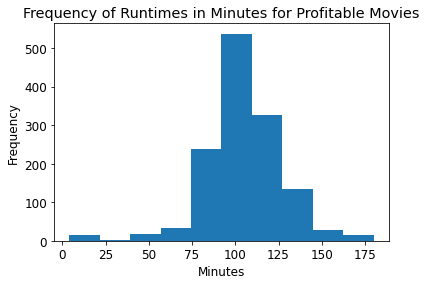

In [45]:
# We can visualize this centrality by creating a histogram of runtime_minutes to see centrality. 
fig, ax = plt.subplots()

ax.hist(profitable_movie_df["runtime_minutes"])
ax.set_title("Frequency of Runtimes in Minutes for Profitable Movies")
ax.set_xlabel("Minutes")
ax.set_ylabel("Frequency");

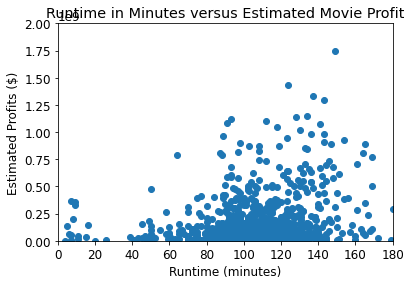

In [46]:
#Create scatter plot to see if there is a correlation between runtime and profitability

fig, ax = plt.subplots()
x = profitable_movie_df["runtime_minutes"]
y = profitable_movie_df["Estimated Profit"]
ax.scatter(x, y)
ax.set(xlim = (0, 180), ylim = (0, 2000000000), 
            title = "Runtime in Minutes versus Estimated Movie Profit",
            xlabel = "Runtime (minutes)",
            ylabel = "Estimated Profits ($)");
                                    

There appears to be a slight positive correlation between runtime and profitablity in the profitable movie dataframe. 
We then looked to see if this holds true for the most profitable movies that we examined with the genre variable. To do this we stored away those most profitable movies as its own data frame most_profitable_df . 

In [47]:
##Create 100 most profitable movies dataframe 
most_profitable_df = profitable_movie_df.sort_values(by = "Estimated Profit", ascending = False)[0:100]
most_profitable_df

,id,release_date,movie,budgets(USD),dom_gross(USD),world_gross(USD),movie_id,genres,runtime_minutes,Estimated Profit,director_name,estimated_profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,tt1775309,Horror,93.0,2351345279,Atsushi Wada,2351345279
18,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,tt4154756,"Action,Adventure,Sci-Fi",149.0,1748134200,Anthony Russo,1748134200
142,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,tt0369610,"Action,Adventure,Sci-Fi",124.0,1433854864,Colin Trevorrow,1433854864
272,67,"Apr 3, 2015",Furious 7,190000000,353007020,1518722794,tt2820852,"Action,Crime,Thriller",137.0,1328722794,James Wan,1328722794
123,27,"May 4, 2012",The Avengers,225000000,623279547,1517935897,tt0848228,"Action,Adventure,Sci-Fi",143.0,1292935897,Joss Whedon,1292935897
...,...,...,...,...,...,...,...,...,...,...,...,...
866,26,"Mar 22, 2013",The Croods,135000000,187168425,573068425,tt0481499,"Action,Adventure,Animation",98.0,438068425,Chris Sanders,438068425
327,81,"May 24, 2019",Aladdin,182000000,246734314,619234314,tt6139732,"Adventure,Comedy,Family",128.0,437234314,Guy Ritchie,437234314
762,78,"Mar 29, 2018",Ready Player One,150000000,137690172,579290136,tt1677720,"Action,Adventure,Sci-Fi",140.0,429290136,Steven Spielberg,429290136
1045,46,"Oct 28, 2011",Puss in Boots,130000000,149260504,554987477,tt0448694,"Action,Adventure,Animation",90.0,424987477,Chris Miller,424987477


In [48]:
#Finding the mean and median for the top 100 most profitable movies from our most_profitable_df and save away as their own variables. 
most_profitable_runtime_mean = most_profitable_df["runtime_minutes"].mean()
most_profitable_runtime_median = most_profitable_df["runtime_minutes"].median()
print(most_profitable_runtime_mean, most_profitable_runtime_median)

121.06 124.0


We see that the 100 most profitable movies have substantially higher runtime mean and median than those from the movie_clean_df (our overall dataset with profitable and unprofitable movies) and the profitable_df dataframe. 

We then created a histogram to see the frequency of runtimes in the 100 most profitable movies. 

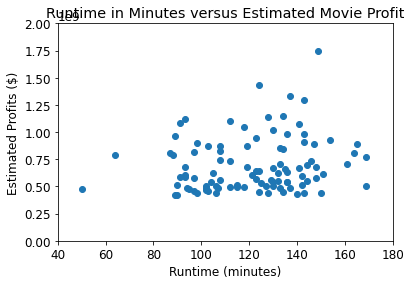

In [49]:
#creating a histogram of the frequency of runtimes for movies in the top 100 most profitable dataframe. 

fig, ax = plt.subplots()
x = most_profitable_df["runtime_minutes"]
y = most_profitable_df["Estimated Profit"]
ax.scatter(x, y)
ax.set(xlim = (40, 180), ylim = (0, 2000000000), 
            title = "Runtime in Minutes versus Estimated Movie Profit",
            xlabel = "Runtime (minutes)",
            ylabel = "Estimated Profits ($)");

Its an odd shape, not the most normal curve, but we see that there are more movies with longer runtimes than in the overall profitable movies dataframe. We also knew this by looking at the mean and median, but it is good to visualize. 

Next we created a least profitable dataframe from our main_clean_df to see if there was a big difference between the 100 most profitable movies and the 100 least profitable (in this case unprofitable) movies. 

In [50]:
#To do this we created a dataframe of unprofitable movies (in case we wanted to dig deeper into this dataset 
# and then sort_values() of the unprofitable_movie_df by our "Estimated Profit" variable in descending order.
unprofitable_movies_df = movie_clean_df[movie_clean_df["Estimated Profit"] < 0]
least_profitable_movies_df = unprofitable_movies_df.sort_values(by = ["Estimated Profit"])[0:100]




In [51]:
#We double checked that the least profitable movie is at the top of our new 100 least profitable (most unprofitable) 
# dataframe. 
least_profitable_movies_df.head()

,id,release_date,movie,budgets(USD),dom_gross(USD),world_gross(USD),movie_id,genres,runtime_minutes,Estimated Profit,director_name,estimated_profit
7,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,tt6565702,"Action,Adventure,Sci-Fi",113.0,-200237650,Simon Kinberg,-200237650
789,94,"Mar 11, 2011",Mars Needs Moms,150000000,21392758,39549758,tt1305591,"Adventure,Animation,Family",88.0,-110450242,Simon Wells,-110450242
1312,42,"Jun 14, 2019",Men in Black: International,110000000,3100000,3100000,tt2283336,"Action,Adventure,Comedy",115.0,-106900000,F. Gary Gray,-106900000
1614,80,"Dec 13, 2017",Bright,90000000,0,0,tt5519340,"Action,Crime,Fantasy",117.0,-90000000,David Ayer,-90000000
1612,79,"Nov 24, 2010",The Nutcracker in 3D,90000000,195459,20466016,tt1041804,"Action,Family,Fantasy",110.0,-69533984,Andrey Konchalovskiy,-69533984


In [52]:
#We looked at the mean and median of this new dataframe to see if it was different from our most profitable movies
least_profitable_runtime_mean = least_profitable_movies_df["runtime_minutes"].mean()
least_profitable_runtime_mean

102.52

In [53]:
least_profitable_runtime_median = least_profitable_movies_df["runtime_minutes"].median()
least_profitable_runtime_median

104.5

We saw that the mean and median of runtimes are similar to the overall data frame and also very different to our most profitable movie list. 

To visualize the distinction of the runtimes of the 100 most profitable movies and the 100 least profitable movies we created an overlapping histogram. We also included the dataset mean to both show that the mean of the overall dataset and the mean runtime of the 100 least profitable movies are not significantly different, but is significantly different than the mean runtime of the 100 most profitable movies. 

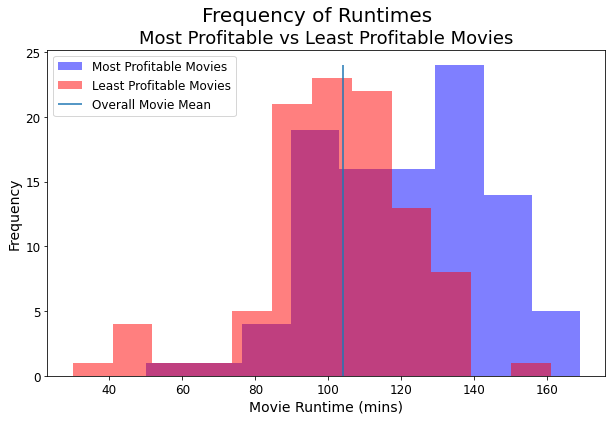

In [54]:
plt.figure(figsize=(10,6))

plt.hist(most_profitable_df["runtime_minutes"], alpha = 0.5, color = "blue", label = "Most Profitable Movies", bins = "fd")
plt.hist(least_profitable_movies_df["runtime_minutes"], alpha = 0.5, color = "red", label = "Least Profitable Movies", bins = "fd")
plt.vlines(x=104, ymin = 0, ymax = 24, label = "Overall Movie Mean")
plt.title("Most Profitable vs Least Profitable Movies", size=18)
plt.suptitle("Frequency of Runtimes", size=20)
plt.xlabel("Movie Runtime (mins)", size=14)
plt.ylabel("Frequency", size=14)
plt.legend(loc="upper left")
plt.savefig("./Movie_Runtime_Hist_Compare_SampMean.png");

Overall, from our analysis of movie runtimes we see that the 100 most profitable movies had on average distinctly longer runtimes than the movies in our cleaned data set. We also saw that this distinction held true when comparing the 100 most profitable movies from the 100 least profitable (most unprofitable) movies. 

From this analysis we drew the recommendation that Microsoft Movie Studios should make movies that are on average 121 minutes (the average of the most profitable movies), which is nearly 15% longer than the average of the least profitable movies. 

## PART V
## Recommendations & Next Steps

From our analysis, we recommend that Microsoft put itself in the best position to create profitable movies by making movies that have the following characteristics: 
    1. Movies of the adventure/action genre
    2. Movies directed by one of the top Directors that outperform their peers particularly James Wan. 
    3. Finally, these movies should have a runtime close to 120 minutes.

In order to ensure Microsoft can pursue this strategy we suggest that in the coming weeks the Movie Studio team:
    1. Determine budget constraints for genre and director selection.
    2. Reach out to teams of top directors for the genre and runtime of their upcoming unsold movies. 